# optimal_circuitry_project3

## Analysis

The National Incident Based Reporting System (NIBRS) is an incident-based reporting system for crimes known to the police. For each crime incident coming to the attention of law enforcement, a variety of data are collected about the incident. These data include the nature and types of specific offenses in the incident, characteristics of the victim(s) and offender(s), types and value of property stolen and recovered, and characteristics of persons arrested in connection with a crime incident.
In this project, I specifically focused on the offenders' data from the 2022 NIBRS dataset. The analysis aims to uncover patterns and insights into the characteristics and behaviors of offenders, contributing to a better understanding of crime incidents and assisting in data-driven policy making and law enforcement strategies.

**Offender Age Distribution** A histogram is created to illustrate the distribution of offender ages. This visualization helps in understanding the age demographics of offenders, which is essential for recognizing trends and potential age-related patterns in criminal behavior.

**Offense Types by Offender Ages** The data is further explored to examine the relationship between offender ages and types of offenses committed. This analysis is valuable for identifying whether certain age groups are more prone to specific types of criminal activities.

**Distribution of Offenders by Sex and Race** Pie and bar charts are utilized to show the distribution of offenders based on sex and race. These visualizations provide a clear representation of the demographic breakdown of offenders, highlighting any disproportionate representation among different groups.

**Geographical Distribution** A horizontal bar chart is used to represent the number of offenders by city. This analysis offers insights into the geographical distribution of criminal activities, identifying areas with higher incidences of offenses.

In conclusion, the analysis conducted provides valuable insights into the characteristics of offenders within the NIBRS dataset. The visualizations and data exploration techniques employed allow for a better understanding of various aspects such as age, sex, race, and geographical distribution of criminal activities.
Understanding these patterns is vital for law enforcement agencies, policymakers, and social scientists in developing targeted strategies for crime prevention and community.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Loading csv file
offenders_data_path = "Resources/offenders_data.csv"

# Reading csv file and storing into Pandas Dataframe
df_offenders = pd.read_csv(offenders_data_path)

df_offenders.head()

,offender_id,offender_age,offender_sex,offender_race,race_description,offender_ethnicity,ethnicity_description,offense_id,offense_code,offense_category_name,...,agency_id,county_name,city_name,location_id,offense_location,offender_victim_relationship,weapon_id,weapon_used,offender_using_code,offender_using_name
0,179473023,30,M,B,Black or African American,N,Not Hispanic or Latino,189054496,09A,Homicide Offenses,...,2615,DUVAL,"Jacksonville, FL",35,Residence/Home,Relationship Unknown,3,Handgun,C,Computer Equipment (Handheld Devices)
1,179473024,23,M,B,Black or African American,N,Not Hispanic or Latino,189054496,09A,Homicide Offenses,...,2615,DUVAL,"Jacksonville, FL",35,Residence/Home,Relationship Unknown,3,Handgun,C,Computer Equipment (Handheld Devices)
2,193172405,27,M,B,Black or African American,N,Not Hispanic or Latino,202968209,09A,Homicide Offenses,...,3203,PINELLAS,"Tampa-St. Petersburg-Clearwater, FL",35,Residence/Home,Victim Was Acquaintance,1,Firearm,C,Computer Equipment (Handheld Devices)
3,183959489,36,M,U,Unknown,X,Not Specified,193621678,13B,Assault Offenses,...,2920,LEON,"Tallahassee, FL",35,Residence/Home,Relationship Unknown,41,Personal Weapons,C,Computer Equipment (Handheld Devices)
4,192047850,48,M,W,White,N,Not Hispanic or Latino,201836372,13B,Assault Offenses,...,2920,LEON,"Tallahassee, FL",98,Other/Unknown,Relationship Unknown,41,Personal Weapons,C,Computer Equipment (Handheld Devices)


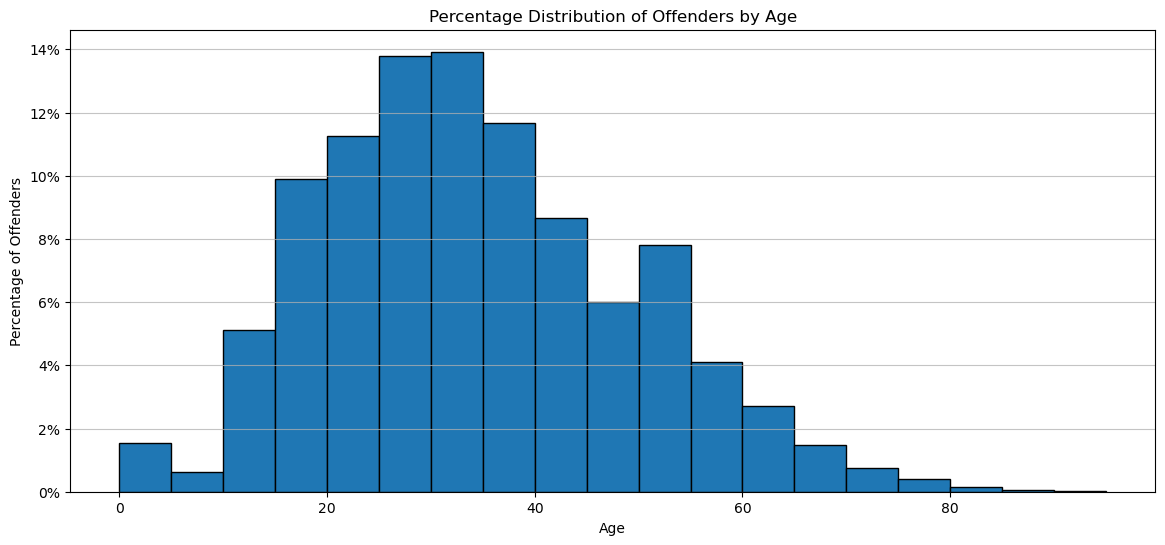

In [3]:
# Creating a histogram for the distribution of offender ages showing percentages
plt.figure(figsize=(14, 6))
plt.hist(df_offenders['offender_age'], bins=range(min(df_offenders['offender_age']), max(df_offenders['offender_age']) + 1, 5), edgecolor='black', weights=np.ones(len(df_offenders)) / len(df_offenders))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.title('Percentage Distribution of Offenders by Age')
plt.xlabel('Age')
plt.ylabel('Percentage of Offenders')
plt.grid(axis='y', alpha=0.75)

plt.show()


**Offender Age Distribution** The histogram peaks in the age range of late teens to mid-twenties, suggesting that the majority of offenders in the dataset are in this age group. This is a common trend in crime statistics, where younger individuals are often associated with higher criminal activity.The histogram also shows a small percentage of offenders who are under 20 years old, highlighting the presence of juvenile delinquency within the dataset.There is a noticeable decline in the percentage of offenders as the age increases past the late twenties. Offenders in middle age and older age brackets constitute a smaller portion of the dataset.The concentration of offenders in the younger demographic could suggest that targeted interventions in early life stages, such as during adolescence or early adulthood, might be effective in reducing crime rates.This histogram can provide valuable insights for law enforcement agencies, policymakers, and social service organizations to understand the demographics of offenders and to design age-specific crime prevention and rehabilitation programs.

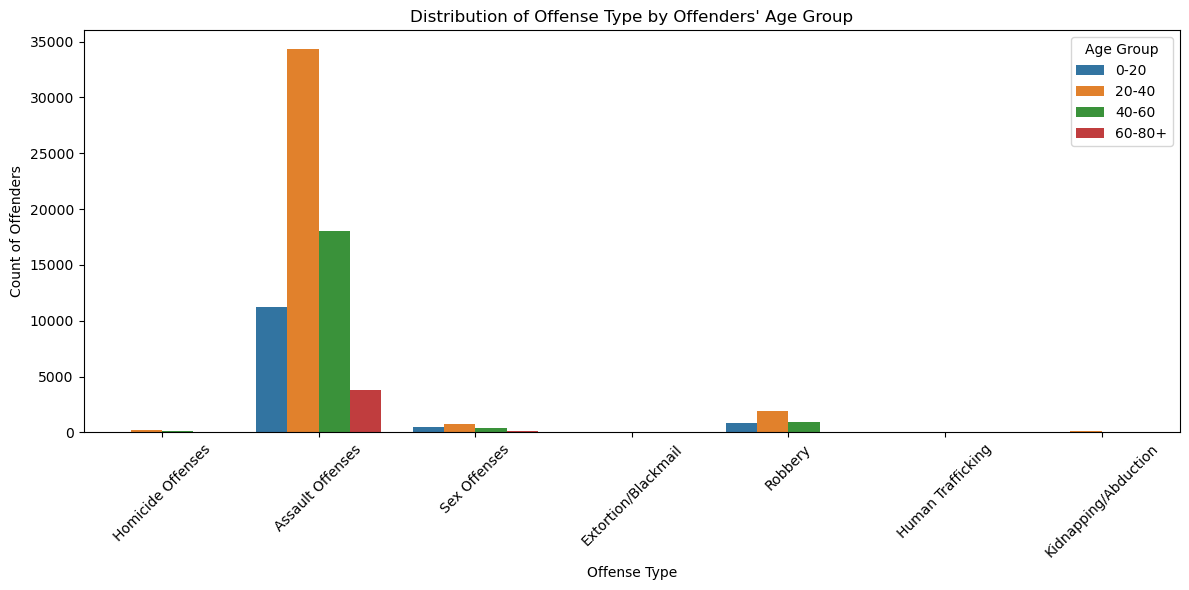

In [4]:
# Creating a count plot for the distribution of offense types by offender ages 

# Defining Age Groups
age_bins = [0, 20, 40, 60, 80]
age_labels = ['0-20', '20-40', '40-60', '60-80+']
# Create a new column to store the Age Groups
df_offenders['age_group'] = pd.cut(df_offenders['offender_age'], bins=age_bins, labels=age_labels, right=False)

# Creating the count plot 
plt.figure(figsize=(12, 6))
sns.countplot(x='offense_category_name', data=df_offenders, hue='age_group', palette='tab10')
plt.title('Distribution of Offense Type by Offenders\' Age Group')
plt.xlabel('Offense Type')
plt.ylabel('Count of Offenders')
plt.xticks(rotation=45)  
plt.legend(title='Age Group')
plt.tight_layout()  
plt.show()

**Offense Types by Offender Ages** The count plot shows that the age group of 20-40 appears to be the most represented across most types of offenses, which suggests that individuals in this age range are the most likely to be offenders, according to this dataset.

The specific offense trends are: 
-Assault Offenses: This category has the highest number of offenders, particularly in the 20-40 age group.

-Sex Offenses: There is also a significant count of offenders in the 20-40 age group, followed by the 40-60 age group.

-Robbery: The 20-40 age group is notably dominant in this category, with the count for other age groups being relatively low.

-Extortion/Blackmail: While the counts are overall lower than for assault and sex offenses, the 20-40 age group still shows the highest number of offenders.

The age group of 60-80+ has the lowest count of offenders across all types of offenses, which aligns with general crime trends where criminal activity tends to decrease with age.
The 0-20 age group has a noticeable presence, especially in Assault and Sex Offenses, suggesting that these types of offenses are not uncommon among younger individuals.

The presence of youth offenders in categories like Assault and Sex Offenses highlights the need for early intervention programs targeting at-risk youth to prevent the escalation of criminal behavior.
The data suggests that crime prevention and intervention strategies should be tailored to address the predominant age group of 20-40 years, focusing on the most common offenses within this group.

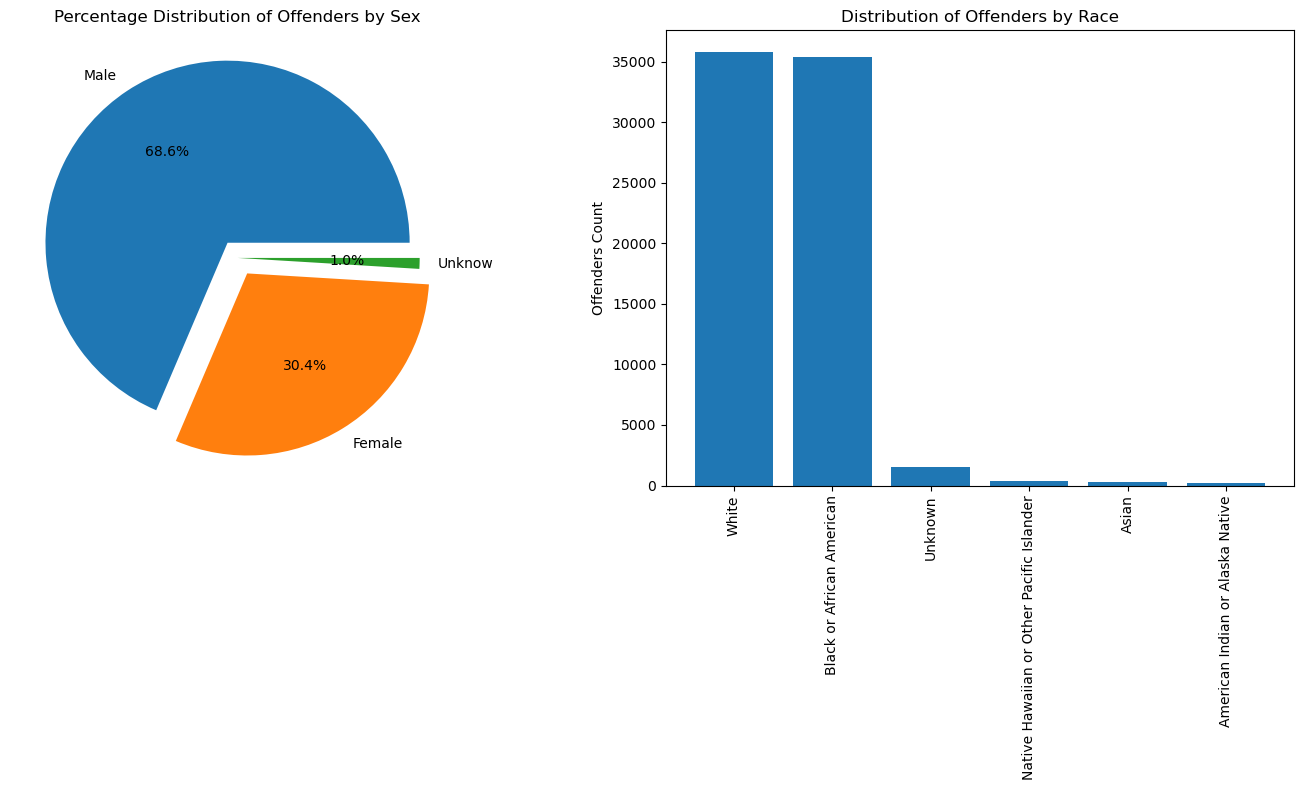

In [5]:
# Creating a pie and a bar chart for the distribution of offenders by sex and race
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,8))

# Creating a pie chart for percentage of offenders by sex 
offender_sex_count = df_offenders['offender_sex'].value_counts()

# Creating the pie chart
labels = ['Male', 'Female', 'Unknow']
ax1.pie(offender_sex_count, labels=labels, autopct='%1.1f%%', explode=(0.1,0.1,0))
ax1.set_title('Percentage Distribution of Offenders by Sex')

# Creating a bar chart for offenders by race
race_description_count = df_offenders['race_description'].value_counts()

# Creating the bar chart
ax2.bar(race_description_count.index, race_description_count)
ax2.set_ylabel('Offenders Count')
ax2.set_title('Distribution of Offenders by Race')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Percentage Distribution of Offenders by Sex (Pie Chart)**
The pie chart indicates a significant gender disparity among offenders, with males constituting a majority at 68.6%.
Females account for 30.4% of the offenders, which is less than half of the male offender proportion. A small fraction (1.0%) of the data has an unspecified gender, labeled as 'Unknown'. This could be due to reporting issues or a deliberate choice to not disclose gender.
The gender distribution suggests that males are significantly more likely to be offenders, or at least more likely to be identified as offenders in this dataset.

**Distribution of Offenders by Race (Bar Chart)**
The bar chart shows that individuals identified as White make up the largest count of offenders, followed closely by those identified as Black or African American.There is a noticeable decrease in counts for individuals identified as Native Hawaiian or Other Pacific Islander, Asian, and American Indian or Alaska Native, suggesting that these racial groups have a smaller number of offenders in the dataset or are underrepresented. Similar to the 'Unknown' category for sex, there is a segment of offenders whose race is not specified.
The high counts of White and Black or African American offenders may reflect demographic proportions within the population, reporting practices, or systemic issues that lead to higher incidences or reporting of crimes among these groups.
The smaller counts for other racial groups could be indicative of their demographic proportions in the general population or could point to potential disparities in crime reporting or recording.

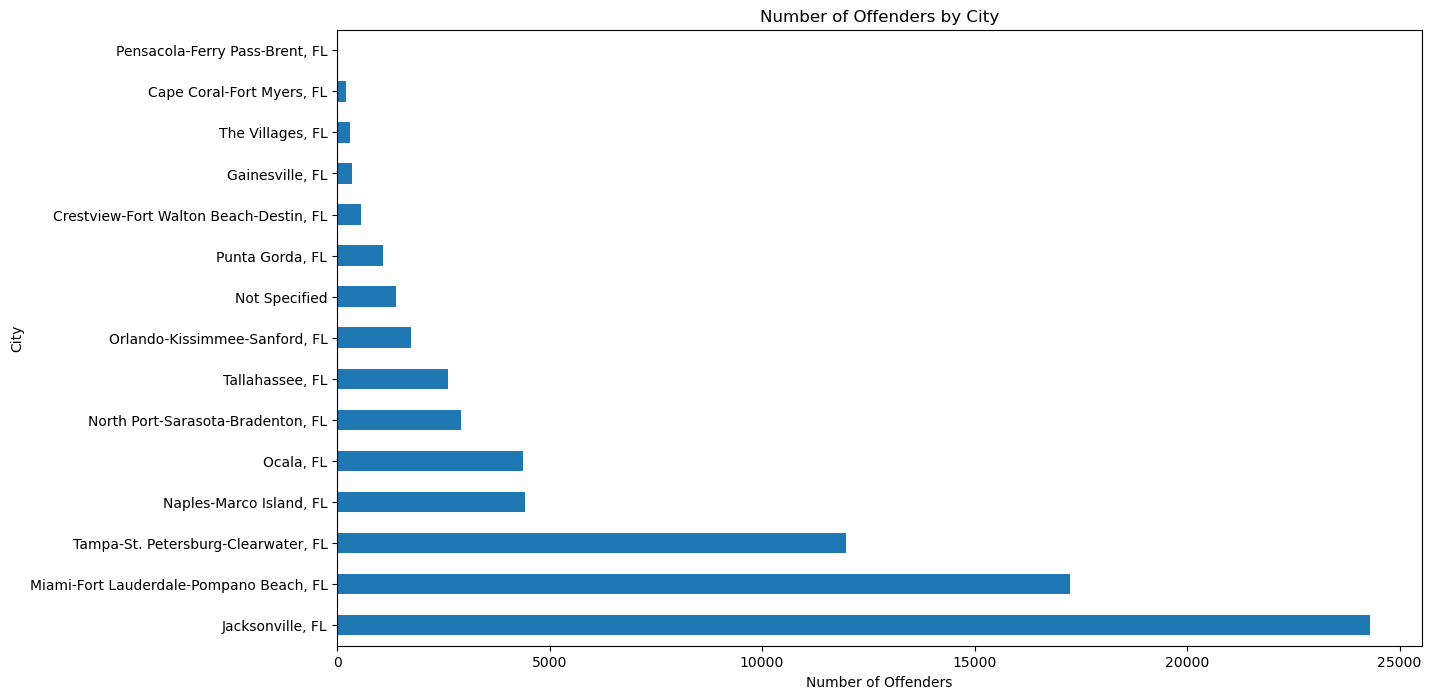

In [6]:
# Creating an horizontal bar chart for the number of offenders by city
city_counts = df_offenders['city_name'].value_counts()

# Creating the chart
plt.figure(figsize=(14, 8))
city_counts.plot(kind='barh')
plt.title('Number of Offenders by City')
plt.xlabel('Number of Offenders')
plt.ylabel('City')
plt.show()


**Number of offenders by city**
The chart shows a clear geographical distribution of offenders across different cities in Florida. Jacksonville, FL, stands out with the highest number of offenders, far exceeding other cities listed. Following Jacksonville, the Miami-Fort Lauderdale-Pompano Beach, FL, metropolitan area also shows a high number of offenders. Cities like Tampa-St. Petersburg-Clearwater, FL, and Naples-Marco Island, FL, show a moderate number of offenders.
Cities like The Villages, FL, and Gainesville, FL, have a lower count of offenders.
The distribution likely reflects not only the crime rates in these cities but also their respective populations. Larger cities like Jacksonville and the Miami metropolitan area naturally have higher populations, which could contribute to the higher number of offenders. The chart could serve as a useful tool for allocating law enforcement resources and developing targeted crime prevention programs. For instance, the significant number of offenders in Jacksonville may warrant additional resources or policy attention.